# STRUCTURE:
## - Experiment settings
#### -- Initialise the models
#### -- Fit the AR model
#### -- Fit the non-AR model
#### -- Save the models
## - Experiment results observation
#### --  Compare the models' performance
#### -- Plot the latent $\alpha$s
#### -- Plot the latent $\theta$s
#### -- Plot the latent $\phi$s
#### -- Visualise the init $\beta$s
#### -- Visualise the init $\theta$s
## - Initialisation
#### -- Set parameters
#### -- Paste a corpus settings (from assess_synthetic-corpus.ipynb)
#### -- Generate the corpus and initialise the helpers
#### -- Save the corpus
## - AUTOMATISATION
#### -- Run the AR and Non-ar models on 10 distinct datasets

# EXPERIMENT SETTINGS

### Initialise the models

In [5]:
from dtm_alpha import DTM_Alpha
var_init = 1
var_basic = 0.1
var_prop = 0.3
beta = 1./V
clf_ar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                delta_sq=var_prop, autoreg=True)
clf_nonar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                delta_sq=var_prop, autoreg=False)

### Fit the AR model

In [6]:
n_it = 5000
n_it_add = 0
n_burn_it = 1000
name_ar = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(True))
name_ar_loaded = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(True))
''' 
Fit
'''
clf_ar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)
'''
Load and fit
'''
# clf_ar.load_fit(PATH_OUT_MODEL + name_ar, n_it_add=n_it_add)

DTM_Alpha has started.
Initialisation run-time: 0.07
The burn-in started.
Alpha update run-time: 0.02
Gibbs sampling run-time: 0.40
Iteration: 25
Alpha update rate: 0.43
Iteration: 50
Alpha update rate: 0.42
Iteration: 75
Alpha update rate: 0.42
Iteration: 100
Alpha update rate: 0.43
Iteration: 125
Alpha update rate: 0.43
Iteration: 150
Alpha update rate: 0.43
Iteration: 175
Alpha update rate: 0.43
Iteration: 200
Alpha update rate: 0.44
Iteration: 225
Alpha update rate: 0.43
Iteration: 250
Alpha update rate: 0.43
Iteration: 275
Alpha update rate: 0.44
Iteration: 300
Alpha update rate: 0.44
Iteration: 325
Alpha update rate: 0.44
Iteration: 350
Alpha update rate: 0.44
Iteration: 375
Alpha update rate: 0.44
Iteration: 400
Alpha update rate: 0.44
Iteration: 425
Alpha update rate: 0.44
Iteration: 450
Alpha update rate: 0.44
Iteration: 475
Alpha update rate: 0.44
Iteration: 500
Alpha update rate: 0.43
Iteration: 525
Alpha update rate: 0.44
Iteration: 550
Alpha update rate: 0.44
Iteration: 57

'\nLoad and fit\n'

### Fit the non-AR model

In [7]:
name_nonar = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(False))
name_nonar_loaded = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(False))
'''
Fit
'''
clf_nonar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)
'''
Load and fit
'''
# clf_nonar.load_fit(PATH_OUT_MODEL + name_nonar, n_it_add=n_it_add)

DTM_Alpha has started.
Initialisation run-time: 0.03
The burn-in started.
Alpha update run-time: 0.01
Gibbs sampling run-time: 0.38
Iteration: 25
Alpha update rate: 0.46
Iteration: 50
Alpha update rate: 0.47
Iteration: 75
Alpha update rate: 0.48
Iteration: 100
Alpha update rate: 0.49
Iteration: 125
Alpha update rate: 0.50
Iteration: 150
Alpha update rate: 0.50
Iteration: 175
Alpha update rate: 0.50
Iteration: 200
Alpha update rate: 0.50
Iteration: 225
Alpha update rate: 0.50
Iteration: 250
Alpha update rate: 0.50
Iteration: 275
Alpha update rate: 0.51
Iteration: 300
Alpha update rate: 0.51
Iteration: 325
Alpha update rate: 0.51
Iteration: 350
Alpha update rate: 0.51
Iteration: 375
Alpha update rate: 0.51
Iteration: 400
Alpha update rate: 0.51
Iteration: 425
Alpha update rate: 0.51
Iteration: 450
Alpha update rate: 0.51
Iteration: 475
Alpha update rate: 0.51
Iteration: 500
Alpha update rate: 0.51
Iteration: 525
Alpha update rate: 0.51
Iteration: 550
Alpha update rate: 0.51
Iteration: 57

'\nLoad and fit\n'

### Save the models

In [8]:
import os
if not os.path.exists(PATH_OUT_MODEL):
    os.makedirs(PATH_OUT_MODEL)
'''
AR
'''
vars_ar = vars(clf_ar)
pkl.dump(vars_ar, open(PATH_OUT_MODEL + name_ar, 'wb'))
# pkl.dump(vars_ar, open(PATH_OUT_MODEL + name_ar_loaded, 'wb'))
'''
Non-AR
'''
vars_nonar = vars(clf_nonar)
pkl.dump(vars_nonar, open(PATH_OUT_MODEL + name_nonar, 'wb'))
# pkl.dump(vars_nonar, open(PATH_OUT_MODEL + name_nonar_loaded, 'wb'))

# EXPERIMENT RESULTS' OBSERVATION

### Compare the models' performance

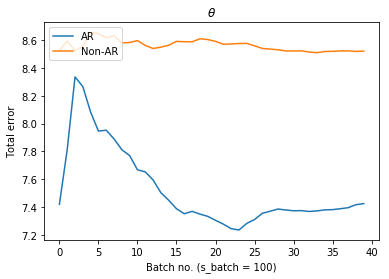

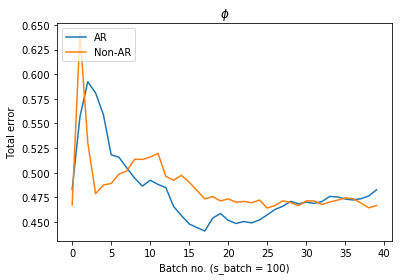

In [9]:
s_batch = 100
performance_ar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init,
                                                         theta_init=theta_init, clf=clf_ar, s_batch=s_batch)
performance_nonar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init, 
                                                            theta_init=theta_init, clf=clf_nonar, s_batch=s_batch)
import os
if not os.path.exists(PATH_OUT_PERF):
    os.makedirs(PATH_OUT_PERF)

name_ar_file = 'performance_dataset-{}_it-{}_ar-True.pkl'.format(no_corpus, n_it)
name_nonar_file = 'performance_dataset-{}_it-{}_ar-False.pkl'.format(no_corpus, n_it)

pkl.dump(performance_ar, open(PATH_OUT_PERF + name_ar_file, 'wb'))
pkl.dump(performance_nonar, open(PATH_OUT_PERF + name_nonar_file, 'wb'))

visualiser_corpus.compare_performances(performance_ar, performance_nonar, s_batch)

### Plot the latent $\theta$s

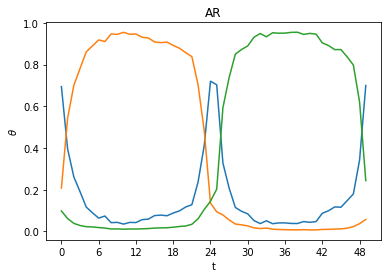

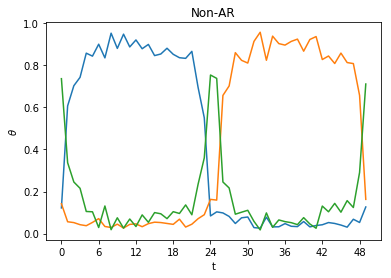

In [18]:
thetas_ar = np.array(clf_ar.hist_theta)
theta_ar_average = np.average(thetas_ar, axis=0)
visualiser_corpus.plot_latent_thetas(theta_ar_average, title='AR')

thetas_nonar = np.array(clf_nonar.hist_theta)
theta_nonar_average = np.average(thetas_nonar, axis=0)
visualiser_corpus.plot_latent_thetas(theta_nonar_average, title='Non-AR')

### Plot the latent $\phi$s

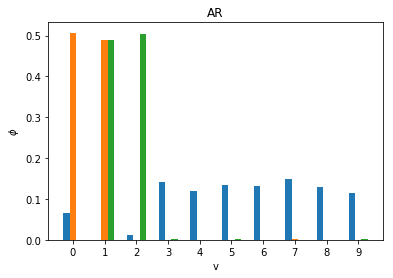

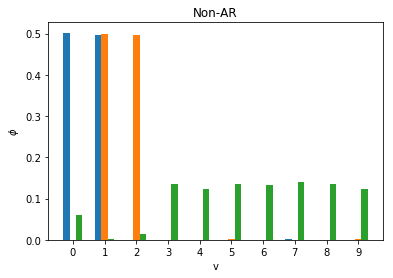

In [19]:
phis_ar = np.array(clf_ar.hist_phi)
phi_ar_average = np.average(phis_ar, axis=0)
visualiser_corpus.plot_latent_phis(phi_ar_average, title='AR')

phis_nonar = np.array(clf_nonar.hist_phi)
phi_nonar_average = np.average(phis_nonar, axis=0)
visualiser_corpus.plot_latent_phis(phi_nonar_average, title='Non-AR')

### Visualise the init $\phi$s

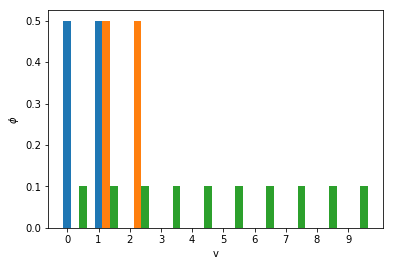

In [13]:
title='Topic term overlap: enabled $\quad$ Error overlap: disabled'
title=''
visualiser_corpus.plot_init_phi(beta_init, title)

### Visualise the init $\theta$s

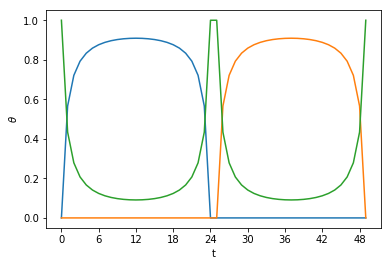

In [14]:
title='Topic overlap: enabled'
title=''
visualiser_corpus.plot_init_thetas(title, alphas=alpha_init, thetas=theta_init)

### Visualise the init $\alpha$s

In [ ]:
visualiser_corpus.plot_init_alphas(alpha_init)

# INITIALISATION

### Set the parameters

In [1]:
import os
import sys
import pandas as pd
import numpy as np
import pickle as pkl
np.set_printoptions(threshold=np.nan)
import matplotlib.pyplot as plt
%matplotlib inline
%load_ext autoreload
%autoreload 2

PATH_HOME = os.path.expanduser('~') + '/Projects/ssmsi/'
PATH_SRC_MODEL = PATH_HOME + 'code/models/'
PATH_SRC_AUXILIARY = PATH_HOME + 'code/pre-processing/'
PATH_DATA = PATH_HOME + 'data/corpora_processed/'
sys.path.append(PATH_SRC_MODEL)
sys.path.append(PATH_SRC_AUXILIARY)

V = 10
vocab = pd.read_pickle(PATH_DATA + 'vocab_synthetic.pkl')

from visualiser_corpus import Visualiser_Corpus
from processor_corpus import Processor_Corpus
from generator_corpus import Generator_Corpus
from helper_experiment import Helper_Experiment

### Paste a corpus setting

In [2]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-ol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]

### Generate the corpus and initialise the helpers

In [3]:
no_corpus = 11
PATH_OUT_PLOTS = PATH_HOME + 'data/models/{}/plots/'.format(name_corpus)
PATH_OUT_MODEL = PATH_HOME + 'data/models/{}/prefit-models/'.format(name_corpus)
PATH_OUT_PERF = PATH_HOME + 'data/models/{}/performance/'.format(name_corpus)
'''
Option 1: Load a corpus
'''
# name_corpus_in = 'corpus_{}_dataset-{}_nparray.pkl'.format(name_corpus, no_corpus)
# corpus_pp = pd.read_pickle(PATH_DATA + name_corpus_in)
'''
Option 2: Generate and pre-process a corpus
'''
generator_corpus = Generator_Corpus(alpha_init=alpha_init, theta_init=theta_init, beta_init=beta_init, xi=xi, T=T)
corpus = generator_corpus.generate_corpus()
processor_corpus = Processor_Corpus(corpus=corpus, vocab=vocab)
count_max = 50
normalise = True
corpus_pp = processor_corpus.process_corpus(threshold=count_max, normalise=normalise)
'''
Initialising the visualisation factory
'''
l_row = 62
l_column = 1.25
n_rows = 8
visualiser_corpus = Visualiser_Corpus(corpus_pp, vocab, n_rows, l_row, l_column, PATH_OUT_PLOTS, name_corpus, no_corpus)
'''
Initialising the experiment helper
'''
helper_experiment = Helper_Experiment()

### Save the corpus

In [4]:
name_corpus_out = 'corpus_{}_dataset-{}_nparray.pkl'.format(name_corpus, no_corpus)
corpus_pp.dump(PATH_DATA + name_corpus_out)
vocab = processor_corpus.vocab
# vocab.dump(PATH_DATA + 'vocab_synthetic.pkl')

# AUTOMATISATION

### Run the AR and Non-ar models on 10 distinct datasets

#######
1
#######
DTM_Alpha has started.
Initialisation run-time: 0.02
The burn-in started.
Alpha update run-time: 0.02
Gibbs sampling run-time: 0.48
Iteration: 25
Alpha update rate: 0.45
Iteration: 50
Alpha update rate: 0.44
Iteration: 75
Alpha update rate: 0.44
Iteration: 100
Alpha update rate: 0.44
Iteration: 125
Alpha update rate: 0.44
Iteration: 150
Alpha update rate: 0.44
Iteration: 175
Alpha update rate: 0.45
Iteration: 200
Alpha update rate: 0.45
Iteration: 225
Alpha update rate: 0.45
Iteration: 250
Alpha update rate: 0.45
Iteration: 275
Alpha update rate: 0.45
Iteration: 300
Alpha update rate: 0.45
Iteration: 325
Alpha update rate: 0.45
Iteration: 350
Alpha update rate: 0.45
Iteration: 375
Alpha update rate: 0.45
Iteration: 400
Alpha update rate: 0.45
Iteration: 425
Alpha update rate: 0.45
Iteration: 450
Alpha update rate: 0.45
Iteration: 475
Alpha update rate: 0.45
Iteration: 500
Alpha update rate: 0.45
Iteration: 525
Alpha update rate: 0.45
Iteration: 550
Alpha update rate: 

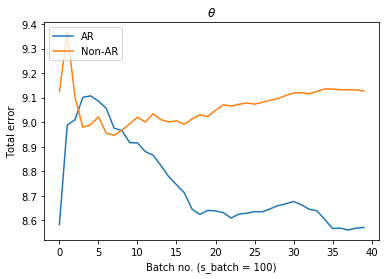

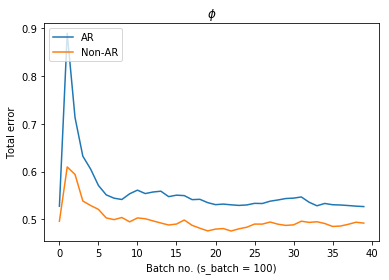

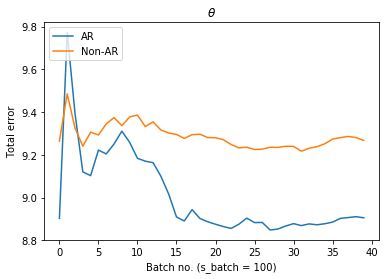

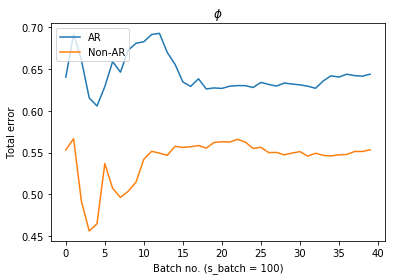

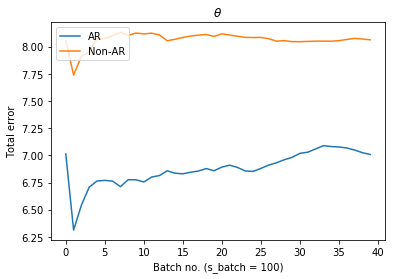

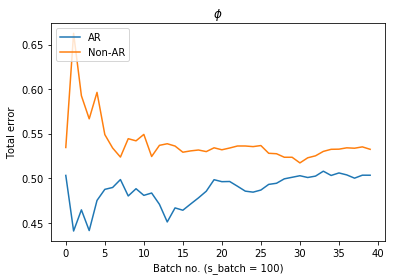

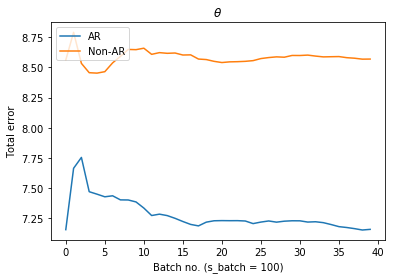

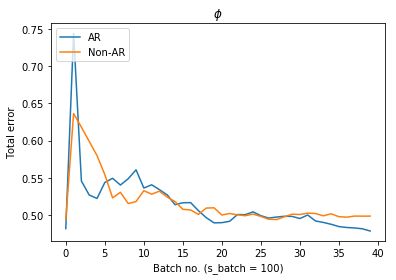

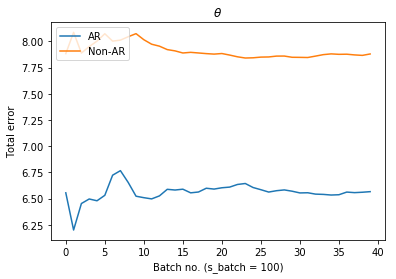

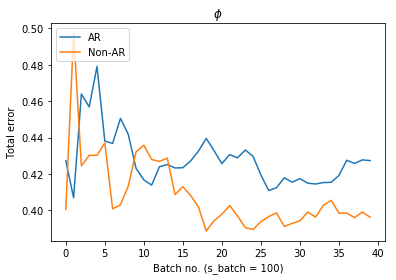

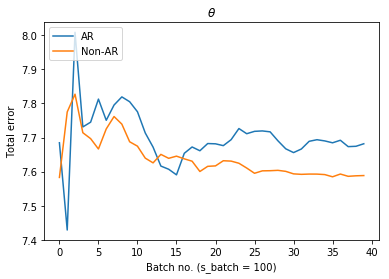

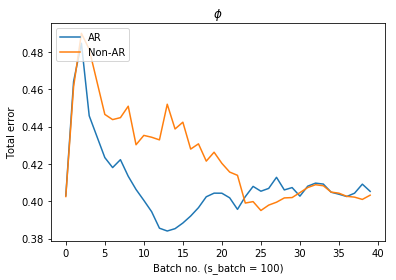

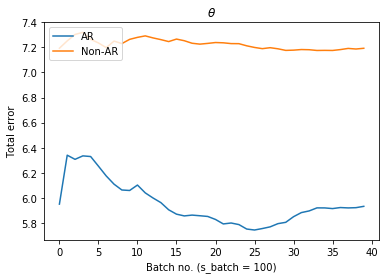

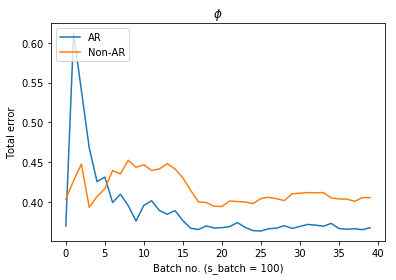

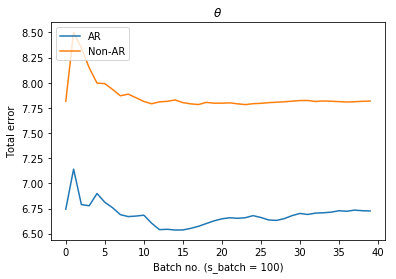

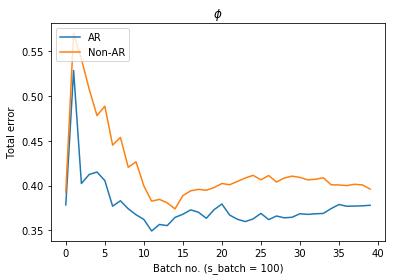

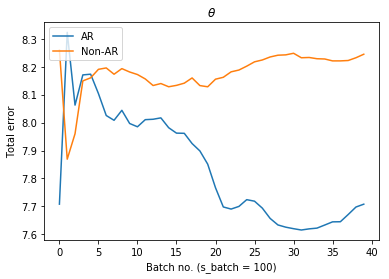

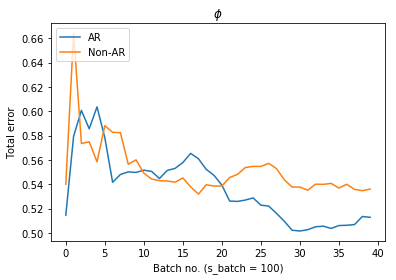

In [9]:
name_corpus = 'exp-4'
name_corpus += "_topic-nonol"
name_corpus += "_terms-ol"
name_corpus += "_error-ol"
K = 3
T = 50
xi = 100
size_instance = int(T/2)

alpha_init = np.zeros((T, K))
beta_init = np.zeros((K, V))
linspace_pi = np.linspace(0, np.pi, num=size_instance)

alpha_init[0:size_instance, 0] = np.sin(linspace_pi)
alpha_init[size_instance:2*size_instance, 1] = np.sin(linspace_pi)
alpha_init[:, 2] = np.linspace(10**-1, 10**-1, num=T)

theta_init = alpha_init / alpha_init.sum(1)[:, None]
alpha_init = None

beta_init[0, :] = [0.5, 0.5, 0, 0, 0, 0, 0, 0, 0, 0]
beta_init[1, :] = [0, 0.5, 0.5, 0, 0, 0, 0, 0, 0, 0]
beta_init[2, :] = [0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1, 0.1]


for i in range(1, 10):
    print('#######')
    print(i)
    print('#######')
    no_corpus = i
    PATH_OUT_PLOTS = PATH_HOME + 'data/models/{}/plots/'.format(name_corpus)
    PATH_OUT_MODEL = PATH_HOME + 'data/models/{}/prefit-models/'.format(name_corpus)
    PATH_OUT_PERF = PATH_HOME + 'data/models/{}/performance/'.format(name_corpus)
    '''
    Option 1: Load a corpus
    '''
#     name_corpus_in = 'corpus_{}_dataset-{}_nparray.pkl'.format(name_corpus, no_corpus)
#     corpus_pp = pd.read_pickle(PATH_DATA + name_corpus_in)
    '''
    Option 2: Generate and pre-process a corpus
    '''
    generator_corpus = Generator_Corpus(alpha_init=alpha_init, theta_init=theta_init, beta_init=beta_init, xi=xi, T=T)
    corpus = generator_corpus.generate_corpus()
    processor_corpus = Processor_Corpus(corpus=corpus, vocab=vocab)
    count_max = 50
    normalise = True
    corpus_pp = processor_corpus.process_corpus(threshold=count_max, normalise=normalise)
    '''
    Initialising the visualisation factory
    '''
    l_row = 62
    l_column = 1.25
    n_rows = 8
    visualiser_corpus = Visualiser_Corpus(corpus_pp, vocab, n_rows, l_row, l_column, PATH_OUT_PLOTS, name_corpus, no_corpus)
    '''
    Initialising the experiment helper
    '''
    helper_experiment = Helper_Experiment()
    
    
    
    name_corpus_out = 'corpus_{}_dataset-{}_nparray.pkl'.format(name_corpus, no_corpus)
    corpus_pp.dump(PATH_DATA + name_corpus_out)
    vocab = processor_corpus.vocab
    # vocab.dump(PATH_DATA + 'vocab_synthetic.pkl')
    
    
    
    from dtm_alpha import DTM_Alpha
    # var_init = 0.1
    # var_basic = 0.01
    # var_prop = 0.1
    '''
    var_basic 0.001 better than 0.01
    '''
    var_init = 1
    var_basic = 0.1
    var_prop = 0.3
    beta = 1./V
    clf_ar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                    delta_sq=var_prop, autoreg=True)
    clf_nonar = DTM_Alpha(K=K, beta=beta, sigma_0_sq=var_init, sigma_sq=var_basic, 
                    delta_sq=var_prop, autoreg=False)
    
    n_it = 5000
    n_it_add = 0
    n_burn_it = 1000
    name_ar = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(True))
    name_ar_loaded = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(True))
    ''' 
    Fit
    '''
    clf_ar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)
    
    
    name_nonar = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(False))
    name_nonar_loaded = 'corpus_{}_dataset-{}_it-{}_ar-{}.pkl'.format(name_corpus, no_corpus, n_it, str(False))
    '''
    Fit
    '''
    clf_nonar.fit(corpus=corpus_pp, n_it=n_it, n_burn_it=n_burn_it)

    import os
    if not os.path.exists(PATH_OUT_MODEL):
        os.makedirs(PATH_OUT_MODEL)
    '''
    AR
    '''
    vars_ar = vars(clf_ar)
    pkl.dump(vars_ar, open(PATH_OUT_MODEL + name_ar, 'wb'))
    # pkl.dump(vars_ar, open(PATH_OUT_MODEL + name_ar_loaded, 'wb'))
    '''
    Non-AR
    '''
    vars_nonar = vars(clf_nonar)
    pkl.dump(vars_nonar, open(PATH_OUT_MODEL + name_nonar, 'wb'))
    # pkl.dump(vars_nonar, open(PATH_OUT_MODEL + name_nonar_loaded, 'wb'))
    
    
    s_batch = 100
    performance_ar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init,
                                                             theta_init=theta_init, clf=clf_ar, s_batch=s_batch)
    performance_nonar = helper_experiment.calculate_performance(alpha_init=alpha_init, beta_init=beta_init, 
                                                                theta_init=theta_init, clf=clf_nonar, s_batch=s_batch)
    import os
    if not os.path.exists(PATH_OUT_PERF):
        os.makedirs(PATH_OUT_PERF)

    name_ar_file = 'performance_dataset-{}_it-{}_ar-True.pkl'.format(no_corpus, n_it)
    name_nonar_file = 'performance_dataset-{}_it-{}_ar-False.pkl'.format(no_corpus, n_it)

    pkl.dump(performance_ar, open(PATH_OUT_PERF + name_ar_file, 'wb'))
    pkl.dump(performance_nonar, open(PATH_OUT_PERF + name_nonar_file, 'wb'))

    visualiser_corpus.compare_performances(performance_ar, performance_nonar, s_batch)
